# Step1: Importing libraries

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.set_option('display.float_format', '{:.1f}'.format)

# Step2: Loading the dataset

In [316]:
df = pd.read_csv("heart.csv")

# Step3: EDA

In [317]:
#reading first 10 rows of the data
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [318]:
#data types in the data
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [319]:
#null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [320]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [321]:
#statistical measures
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.0,918.0,918.0,918.0,918.0,918.0,918.0
mean,53.5,132.4,198.8,0.2,136.8,0.9,0.6
std,9.4,18.5,109.4,0.4,25.5,1.1,0.5
min,28.0,0.0,0.0,0.0,60.0,-2.6,0.0
25%,47.0,120.0,173.2,0.0,120.0,0.0,0.0
50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
max,77.0,200.0,603.0,1.0,202.0,6.2,1.0


In [322]:
#shape of the data
df.shape

(918, 12)

In [323]:
#duplicated lines
df.duplicated().sum()

0

In [324]:
#unique values of categorical features
print(df["Sex"].unique())
print(df["ExerciseAngina"].unique())
print(df["ChestPainType"].unique())
print(df["RestingECG"].unique())
print(df["ST_Slope"].unique())
print(df["FastingBS"].unique())
print(df["HeartDisease"].unique())

['M' 'F']
['N' 'Y']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['Up' 'Flat' 'Down']
[0 1]
[0 1]


In [325]:
#correlation between the numerical columns
numerical_columns = ["Age", "RestingBP", "Cholesterol","MaxHR","Oldpeak","HeartDisease"]
df[numerical_columns].corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
Age,1.0,0.3,-0.1,-0.4,0.3,0.3
RestingBP,0.3,1.0,0.1,-0.1,0.2,0.1
Cholesterol,-0.1,0.1,1.0,0.2,0.1,-0.2
MaxHR,-0.4,-0.1,0.2,1.0,-0.2,-0.4
Oldpeak,0.3,0.2,0.1,-0.2,1.0,0.4
HeartDisease,0.3,0.1,-0.2,-0.4,0.4,1.0


<Axes: >

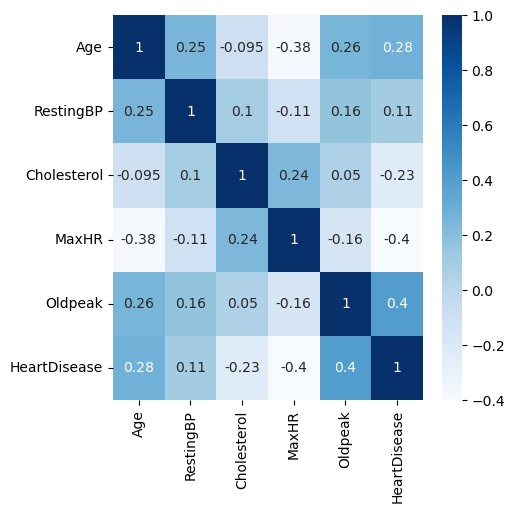

In [326]:
#heatmap for clear image of correlation
plt.figure(figsize = (5, 5))
sns.heatmap(df[numerical_columns].corr(), annot = True, cbar = True, cmap = "Blues")

<Axes: xlabel='Age'>

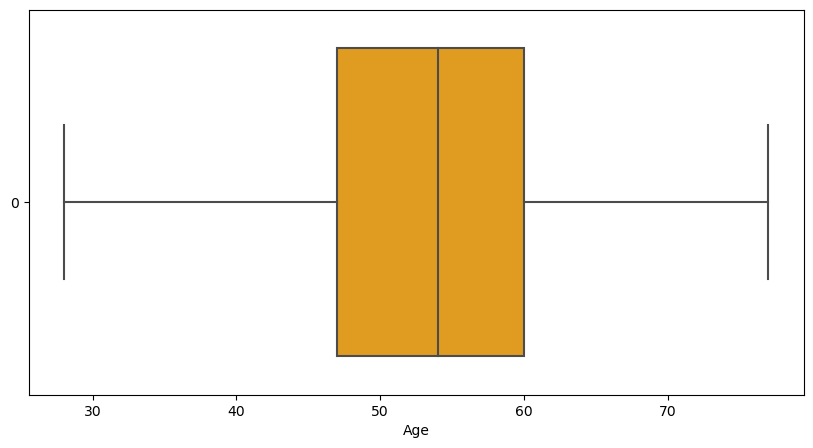

In [327]:
#boxplot for age feature to check the outliers
plt.figure(figsize = (10, 5))
plt.xlabel("Age")
sns.boxplot(df["Age"], orient = "h", color = "orange")

<Axes: xlabel='RestingBP'>

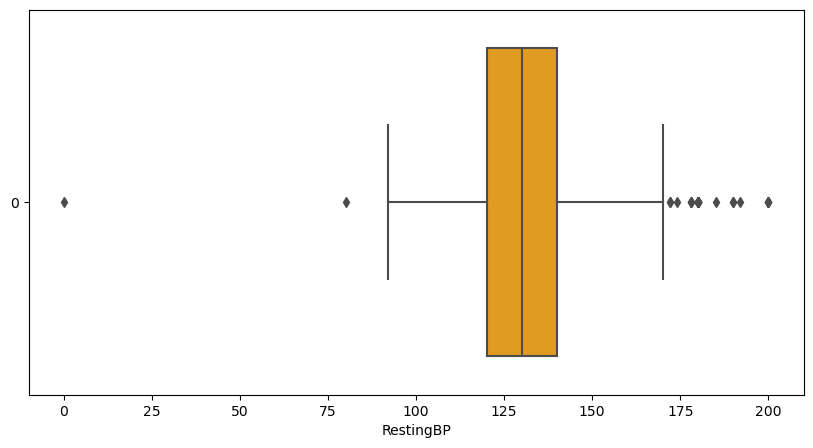

In [328]:
#boxplot for RestingBp feature to check the outliers
plt.figure(figsize = (10, 5))
plt.xlabel("RestingBP")
sns.boxplot(df["RestingBP"], orient = "h", color = "orange")

<Axes: xlabel='Cholesterol'>

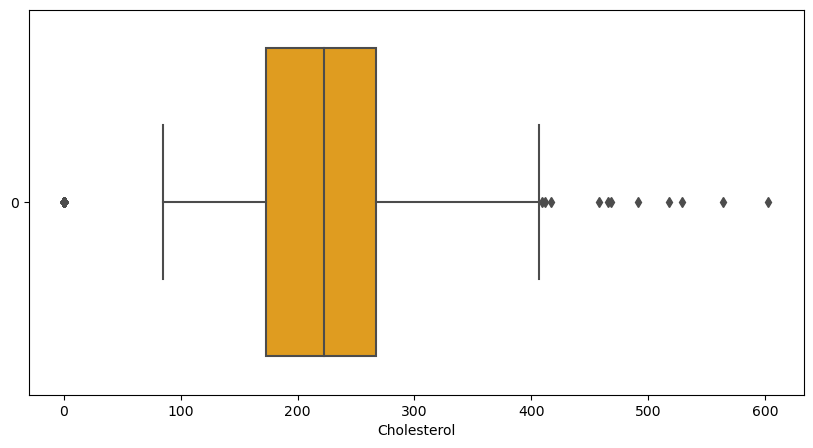

In [329]:
#boxplot for Cholesterol feature to check the outliers
plt.figure(figsize = (10, 5))
plt.xlabel("Cholesterol")
sns.boxplot(df["Cholesterol"], orient = "h", color = "orange")

<Axes: xlabel='MaxHR'>

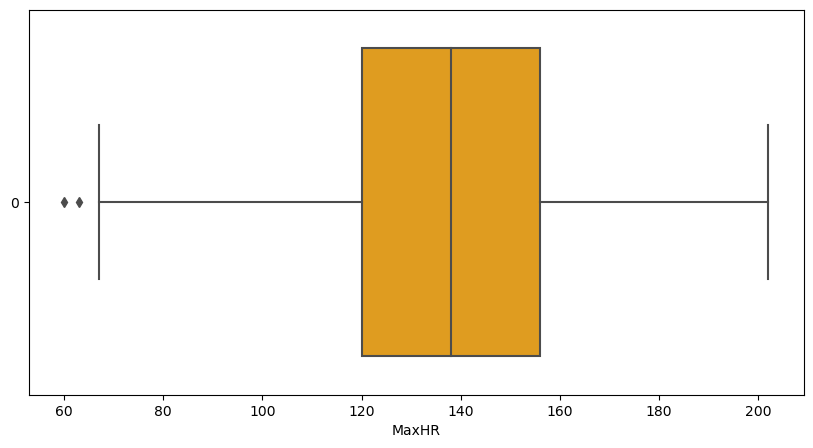

In [330]:
#boxplot for MaxHR feature to check the outliers
plt.figure(figsize = (10, 5))
plt.xlabel("MaxHR")
sns.boxplot(df["MaxHR"], orient = "h", color = "orange")

<Axes: xlabel='Oldpeak'>

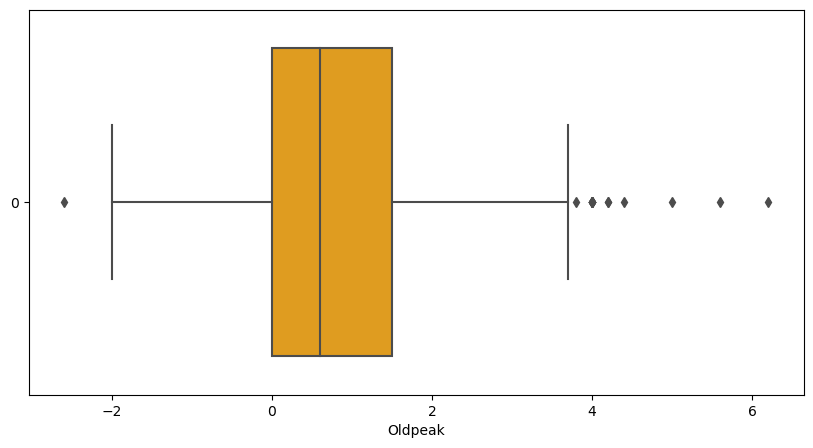

In [331]:
#boxplot for Oldpeak feature to check the outliers
plt.figure(figsize = (10, 5))
plt.xlabel("Oldpeak")
sns.boxplot(df["Oldpeak"], orient = "h", color = "orange")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

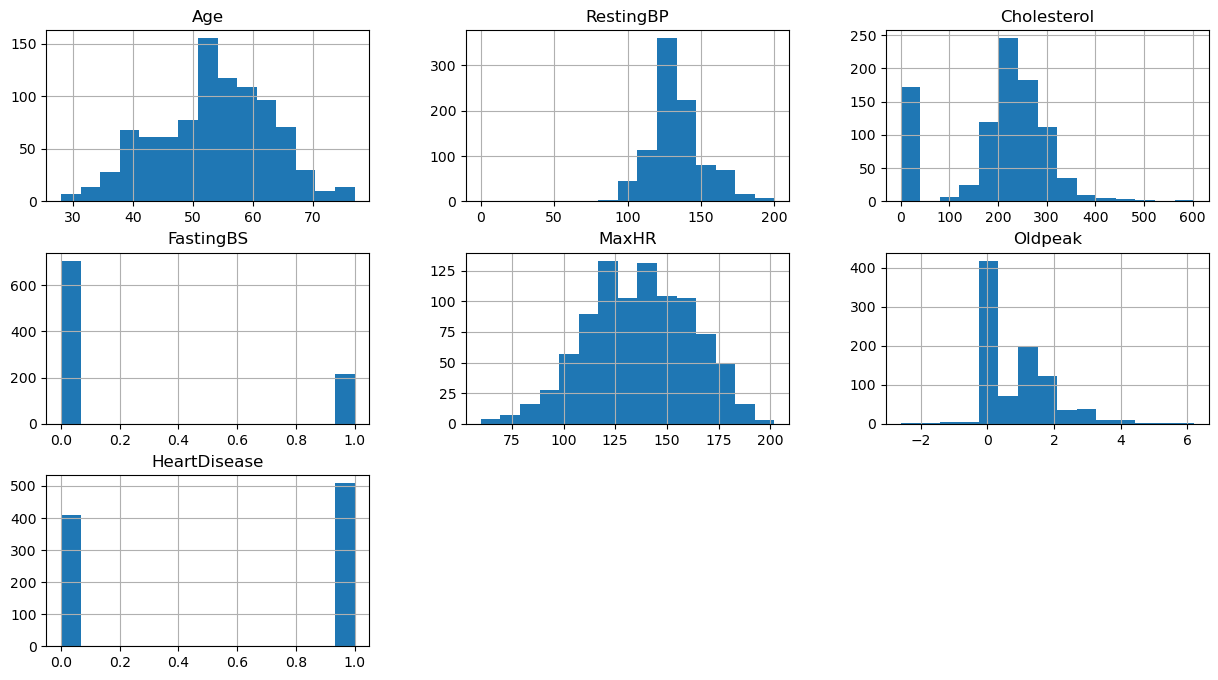

In [332]:
#histograms for all the data
df.hist(bins = 15, figsize = (15, 8))

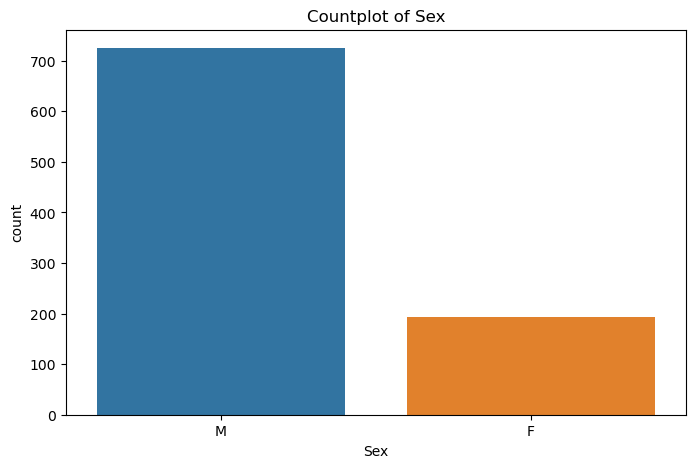

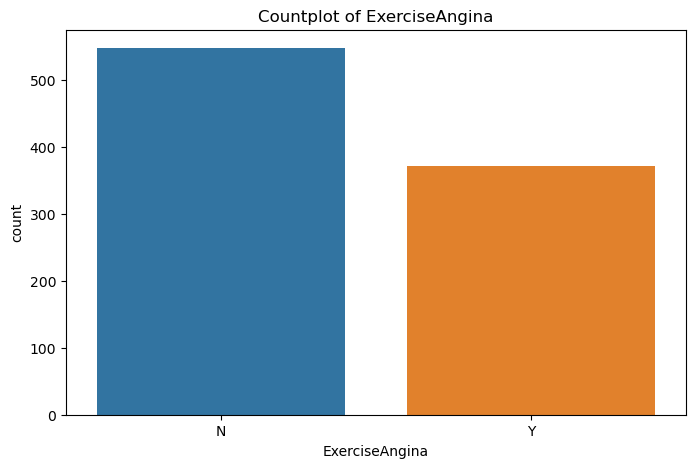

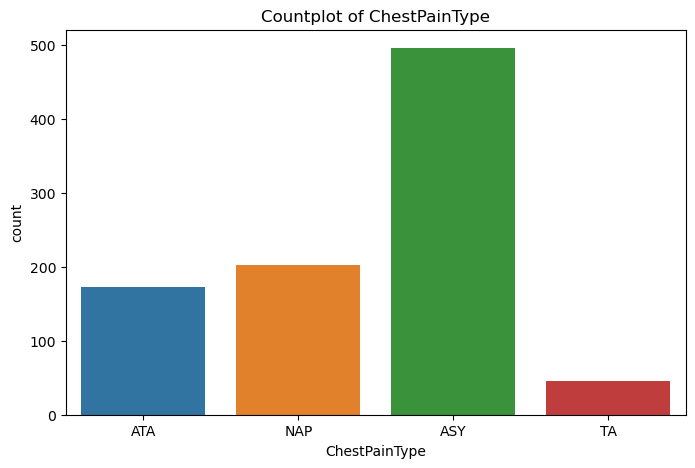

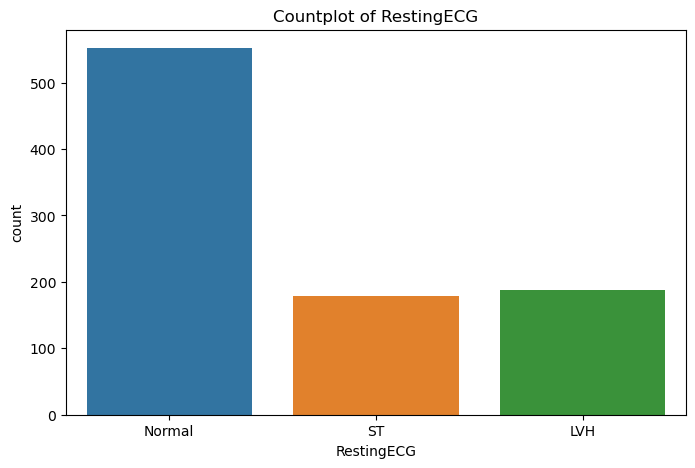

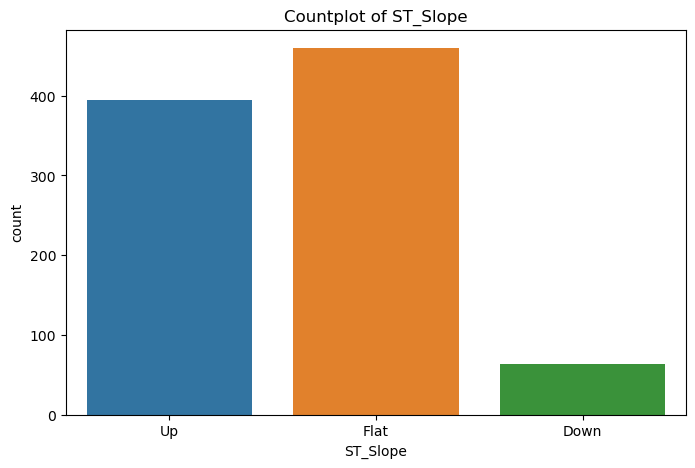

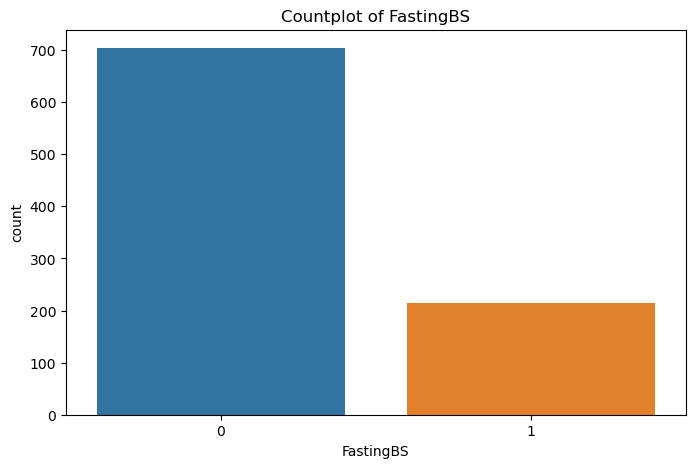

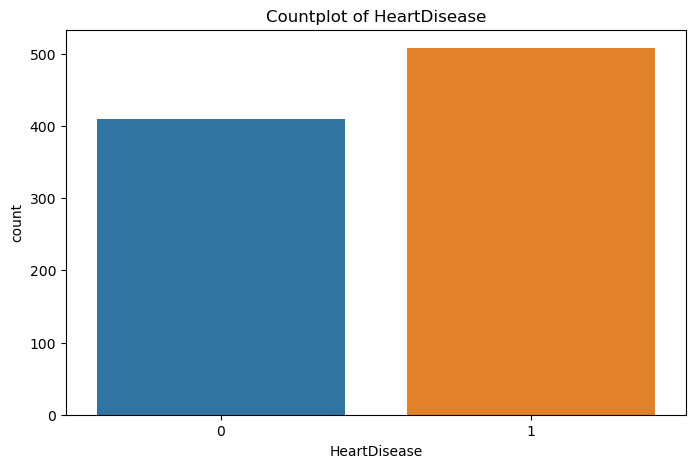

In [333]:
#countplots for caategorical columns
categorical_columns = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope", "FastingBS", "HeartDisease"]
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.show()

# Step4: Data Preprocessing

In [334]:
#preprocessing function
def preprocessing(data):
    data=data.copy()
    
    #encoding categorical features
    data = pd.get_dummies(data, drop_first=True, dtype = int)
    
    #splitting data to train and test
    x = data.drop("HeartDisease", axis = 1)
    y = data["HeartDisease"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)
    
    #scaling
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    return x_train, x_test, y_train, y_test

In [335]:
x_train, x_test, y_train, y_test = preprocessing(df)

# Step5: Modelling

In [336]:
#predicting x_train
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)

accuracy = metrics.accuracy_score(y_train, y_pred_train)

print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 86.38


In [337]:
#predicting x_test
y_pred_test = model.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 89.67
